# Kicked Ising

In [4]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

In [24]:
from ruc import (cptp_map, apply_gates, tensor_trace, trace_square, matrix_to_tensor, random_ρ,
                        tensor_to_matrix, inner_product)

## Kicked Ising circuit gate

Let's build without randomness first

In [69]:
def U_KIM(J, b):
    X = np.array([[0,1], [1, 0]])
    Z = np.array([[1,0], [0, -1]])
    K = np.cos(b) * np.identity(2) - 1j * np.sin(b) * X
    
    ZZ = np.einsum("ab,cd->acbd", Z, Z)
    IdId = np.einsum("ab,cd->acbd", np.identity(2), np.identity(2))
    I = np.cos(J) * IdId - 1j * np.sin(J) * ZZ
    
    KK = np.einsum("ab,cd->acbd", K, K)
    return np.einsum("abcd,cdef,efjk->abjk", I, KK, I)

## Simulate circuit

In [109]:
q = 2
depth = 6
KIM_gates = depth * [U_KIM(np.pi / 4, np.pi / 4)]
ρ = matrix_to_tensor(np.identity(2**depth), 2) / 2**depth
eigenvalues = np.array([])

for step in range(100):
    eigenvalues = np.concatenate([eigenvalues, eigh(tensor_to_matrix(ρ), eigvals_only=True)])
    ρ = cptp_map(ρ, KIM_gates)
    if step % 10 == 0:
        print("step ", step)

step  0
step  10
step  20
step  30
step  40
step  50
step  60
step  70
step  80
step  90


In [110]:
eigenvalues

array([0.015625, 0.015625, 0.015625, ..., 0.015625, 0.015625, 0.015625])

Eigenvalues are all $2^{-\text{depth}}$

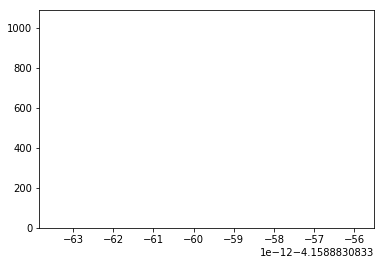

In [111]:
plt.hist(np.log(eigenvalues), bins=20);